# SEER Breast Cancer Dataset 

## About this notebook

The goal was to create a classifying model that is able to take the data of the patient and determine whether the model thinks the patient will survive or not and output how confident it is in such a prediction. This notebook contains the explorative data analyes as a first step.
The analyses includes:
* a general overview of the data (via basic basic python and pandas) 
* data exploration steps of categorical and numerical columns via plotting (bar plots, histograms, box plots) (matplotlib, seaborn)
* basic data cleaning steps (the data set used was already clean and only smaller changes of typos and data types were necessary)
* exploration and visualization of correlations in the data (via corr(), scatterplot(), pairplot(), seaborn.heatmap())

part in brackets to be moved to ML notebook
(* train-test-split of the data (via sklearn - train_test_split())
* re-mapping and encoding of columns (map(), OneHotEncoder())
* instantiation of a basic DecisionTreeClassifier pipeline (via sklearn - DecisionTreeClassifier, imblearn - Pipeline)
* testing of four different re-sampling methods on a basic DecisionTreeModel (via imblearn, sklearn) 
* extracting and visualization of feature importances and plotting a tree for the basic model (sklearn - graphviz)
* confusion_matrix, roc_auc_score, roc_curve)

## About the dataset
This SEER cancer dataset was obtained from an 2017 update of the SEER (The Surveillance, Epidemiology, and End Results)
NCI program. It was uploaded to U-BRITE for "AI against CANCER DATA SCIENCE HACKATHON" (https://cancer.ubrite.org/hackathon-2021/) and can also be found on Kaggle.com.
The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.
The target variable contains the values 'Alive' and 'Dead'. Any patient that died after the follow-up cut-off in 2017 was recorded to be alive as of the cut-off date. 

Licence: Attribution 4.0 International (CC BY 4.0) 

## Contributers to the notebook: 



In [58]:
# import of dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [59]:
# reading in data and checking info
df = pd.read_csv('Breast_Cancer.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

The dataset consists of 16 variables total. Three variables describe the patients age, race, marital status. The remaining thirteen variables describe different charactericts in connection to the diagnosed breast cancer, like tumor size, hormone status, and T + N stages. 
The target variable contains the values 'Alive' and 'Dead'. Any patient that died after the follow-up cut-off in 2017 was recorded to be 'Alive' as of the cut-off date. 

In [60]:
# checking for NaNs
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [146]:
# creating a list of all column names
all_cols = []
for col in df.columns:
    all_cols.append(col)

# function to print overview of uniques and n_uniques for all columns
def display_col_uniques(data, cols):
    """Display uniques and n_uniques for all columns.
    Args: 
        df (pd.DataFrame) : DataFrame
        cols(list) : list of columns to use
    Returns:
        display uniques and n_uniques
    """
    for col in cols:
        print(f'{col}: {df.loc[:,col].unique()}, nunique: {df.loc[:,col].nunique()}\n')

In [147]:
display_col_uniques(df, all_cols)

Age: [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30], nunique: 40

Race: ['White', 'Black', 'Other']
Categories (3, object): ['Black', 'Other', 'White'], nunique: 3

Marital Status: ['Married', 'Divorced', 'Single ', 'Widowed', 'Separated']
Categories (5, object): ['Divorced', 'Married', 'Separated', 'Single ', 'Widowed'], nunique: 5

T Stage: [0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3], nunique: 4

N Stage: [0, 1, 2]
Categories (3, int64): [0, 1, 2], nunique: 3

6th Stage: [0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4], nunique: 5

differentiate: [2, 1, 0, 3]
Categories (4, int64): [0, 1, 2, 3], nunique: 4

Grade: [2, 1, 0, 3]
Categories (4, int64): [0, 1, 2, 3], nunique: 4

A Stage: [0, 1]
Categories (2, int64): [0, 1], nunique: 2

Tumor Size: [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 1

In [62]:
# creating dict to change dtypes of columns
# some varables are ordinal

# correcting a typo in column 'T Stage'
df = df.rename(columns={'T Stage ':'T Stage'})
df = df.rename(columns={'Reginol Node Positive' : 'Regional Node Positive'})
# adding Status_encoded column
df.loc[:,'Status_encoded'] = df.loc[:,'Status'].map({'Alive':0, 'Dead':1})


# creating dictionairy with correct dtypes
dtypes_columns = {'Age' : 'int64',
'Race' : 'category',
'Marital Status' : 'category',
'T Stage' : 'category', 
'N Stage' : 'category',
'6th Stage' : 'category',
'differentiate' : 'category',
'Grade' : 'category',
'A Stage' : 'category', 
'Tumor Size' : 'int64',
'Estrogen Status' : 'category',
'Progesterone Status' : 'category',
'Regional Node Examined' : 'int64',
'Regional Node Positive' : 'int64',
'Survival Months' : 'int64',
'Status' : 'category',
'Status_encoded' : 'int64'}

# setting dtypes
df = df.astype(dtypes_columns)

df.info()

# creating cat_cols and num_cols lists
all_cols = []
for col in df.columns:
    all_cols.append(col)
num_cols = []
cat_cols = []
for col in dtypes_columns:
    if dtypes_columns[col] == 'category':
        cat_cols.append(col)
    elif dtypes_columns[col] == 'int64' or dtypes_columns[col] == 'int32':
        num_cols.append(col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4024 non-null   int64   
 1   Race                    4024 non-null   category
 2   Marital Status          4024 non-null   category
 3   T Stage                 4024 non-null   category
 4   N Stage                 4024 non-null   category
 5   6th Stage               4024 non-null   category
 6   differentiate           4024 non-null   category
 7   Grade                   4024 non-null   category
 8   A Stage                 4024 non-null   category
 9   Tumor Size              4024 non-null   int64   
 10  Estrogen Status         4024 non-null   category
 11  Progesterone Status     4024 non-null   category
 12  Regional Node Examined  4024 non-null   int64   
 13  Regional Node Positive  4024 non-null   int64   
 14  Survival Months         

In [63]:
# function to explore cat_cols
def cat_col_explorer(data, cat_cols, target_name):
    """Displays graphs to explore categorical columns by target.
       
    Args: 
        df (pd.DataFrame) : DataFrame
        cat_cols(list) : list of categorical columns to use
        target_name(str) : string of the target variable
    Returns:
        displays barplots
    """
    for col in cat_cols:
        print(pd.crosstab(index=df.loc[:, col],
                    columns = df.loc[:,target_name], 
                    normalize=False, margins=True))
        
        pd.crosstab(index=df.loc[:, col],
                    columns = df.loc[:,target_name], 
                    normalize=False).plot(kind='bar')
        
        
        plt.show()


Status  Alive  Dead   All
Race                     
Black     218    73   291
Other     287    33   320
White    2903   510  3413
All      3408   616  4024


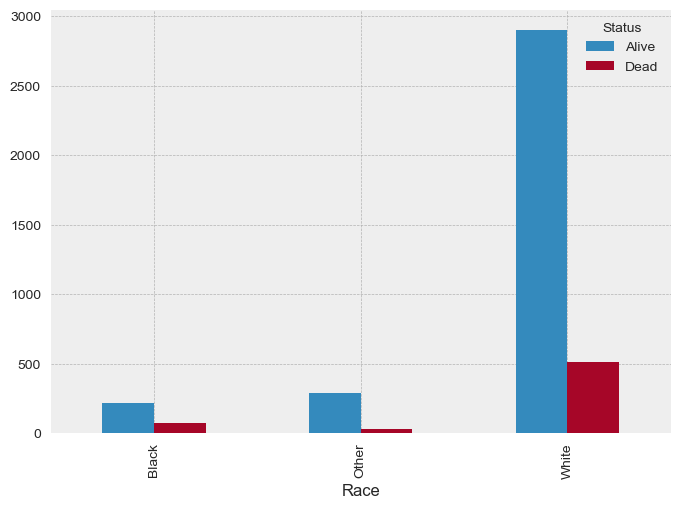

Status          Alive  Dead   All
Marital Status                   
Divorced          396    90   486
Married          2285   358  2643
Separated          30    15    45
Single            511   104   615
Widowed           186    49   235
All              3408   616  4024


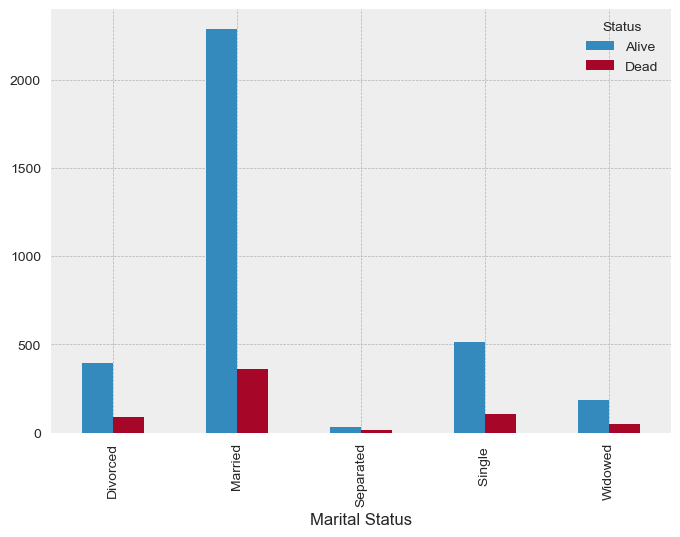

Status   Alive  Dead   All
T Stage                   
T1        1446   157  1603
T2        1483   303  1786
T3         417   116   533
T4          62    40   102
All       3408   616  4024


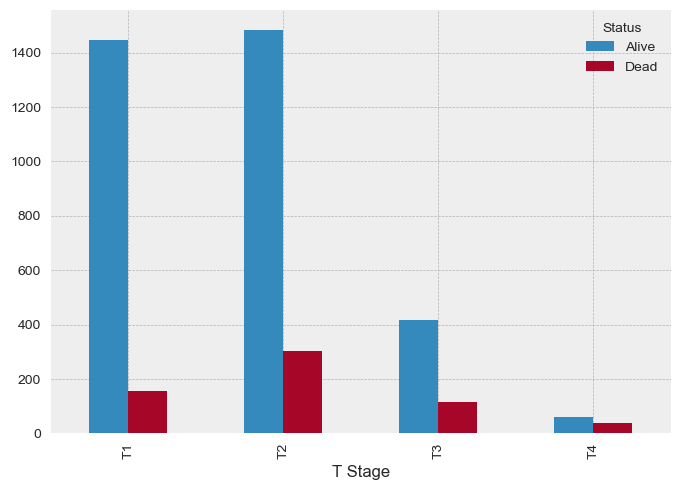

Status   Alive  Dead   All
N Stage                   
N1        2462   270  2732
N2         655   165   820
N3         291   181   472
All       3408   616  4024


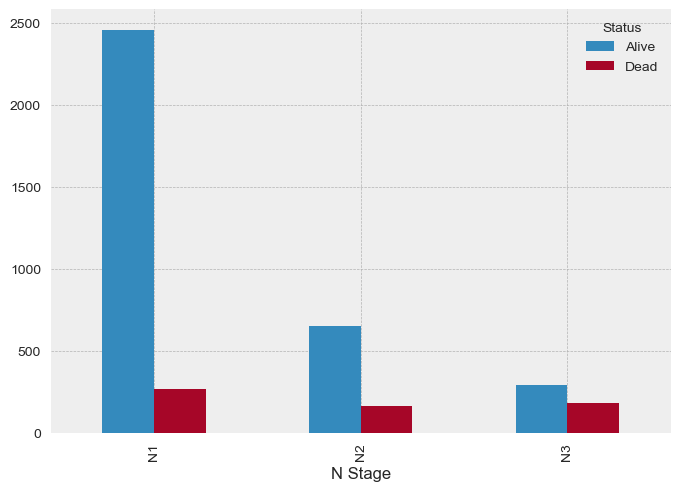

Status     Alive  Dead   All
6th Stage                   
IIA         1209    96  1305
IIB          995   135  1130
IIIA         866   184  1050
IIIB          47    20    67
IIIC         291   181   472
All         3408   616  4024


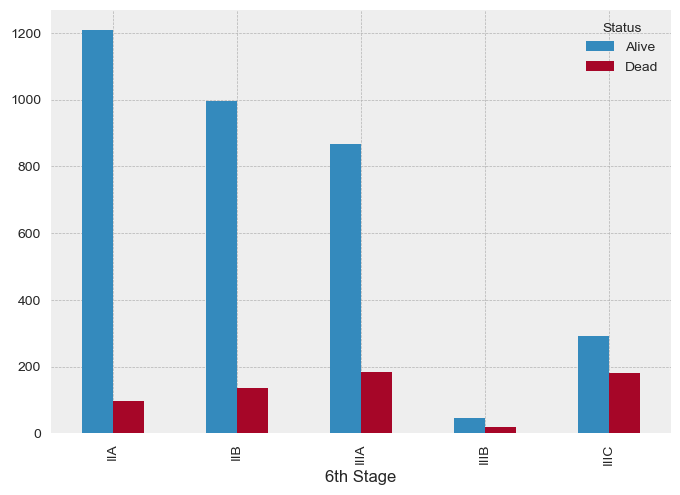

Status                     Alive  Dead   All
differentiate                               
Moderately differentiated   2046   305  2351
Poorly differentiated        848   263  1111
Undifferentiated              10     9    19
Well differentiated          504    39   543
All                         3408   616  4024


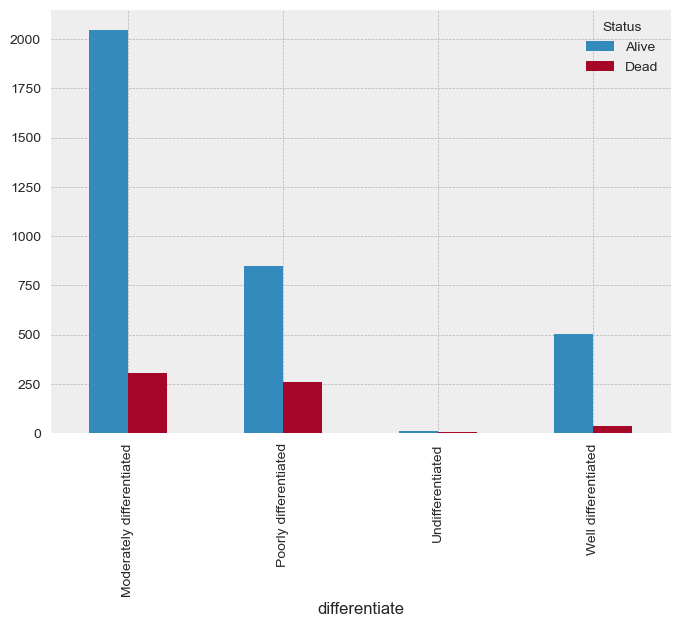

Status                 Alive  Dead   All
Grade                                   
 anaplastic; Grade IV     10     9    19
1                        504    39   543
2                       2046   305  2351
3                        848   263  1111
All                     3408   616  4024


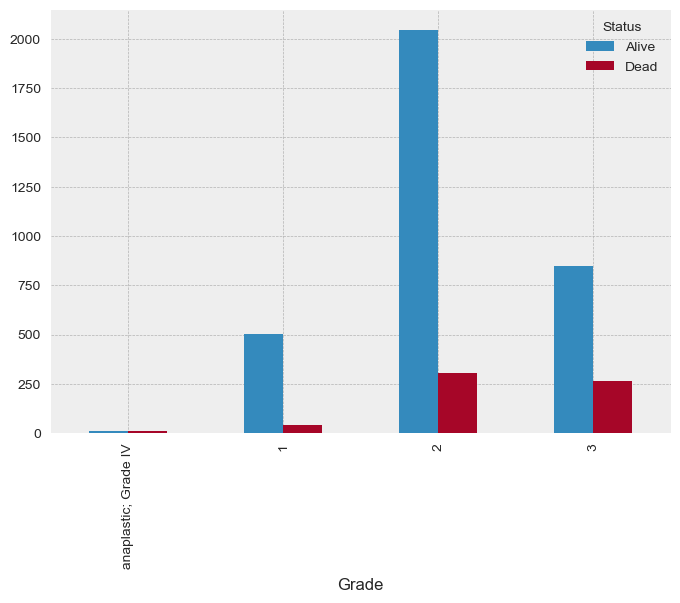

Status    Alive  Dead   All
A Stage                    
Distant      57    35    92
Regional   3351   581  3932
All        3408   616  4024


Status           Alive  Dead   All
Estrogen Status                   
Negative           161   108   269
Positive          3247   508  3755
All               3408   616  4024


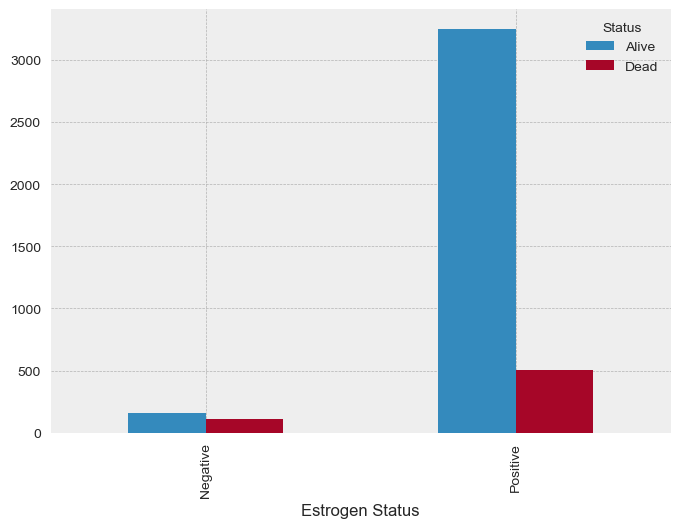

Status               Alive  Dead   All
Progesterone Status                   
Negative               494   204   698
Positive              2914   412  3326
All                   3408   616  4024


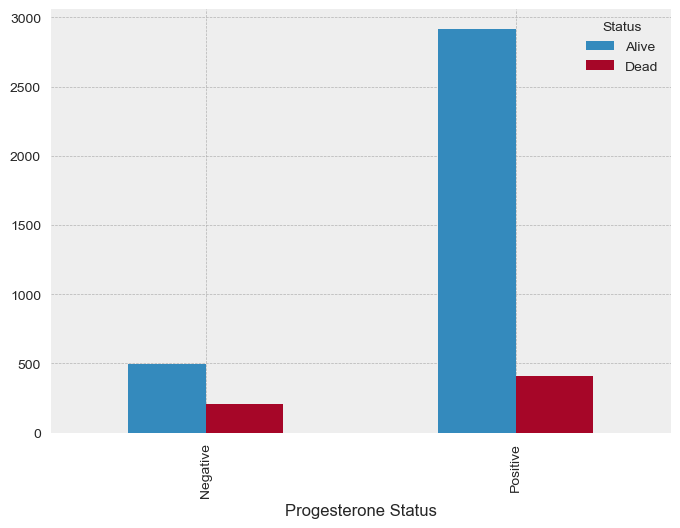

Status  Alive  Dead   All
Status                   
Alive    3408     0  3408
Dead        0   616   616
All      3408   616  4024


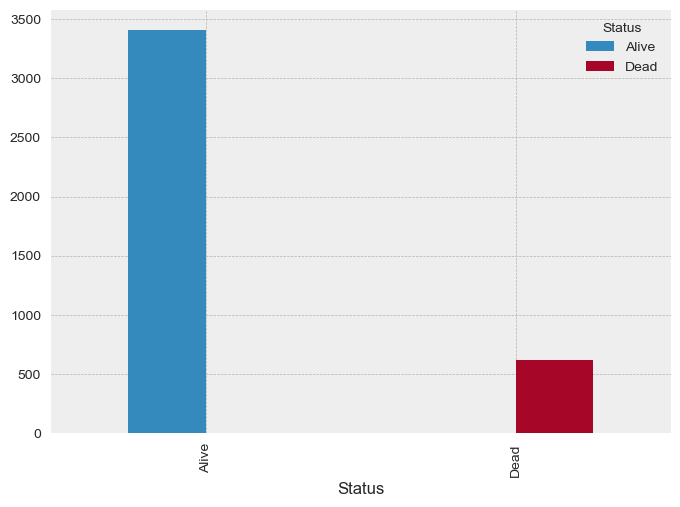

In [64]:
# running function
cat_col_explorer(df, cat_cols, 'Status')

### Observations on categorical columns:
- target variable 'Status 'is highly unbalanced
    - 84.6 % 'Alive', 15.4 % 'Dead'
    - resampling or class_weight 'balanced' necessary
- race and marital status
    - the race record is based on the race variables and the American Indian/Native American IHS link variable. This recode used to link to the populations for White (84.8 %), Black (7.2 %) and Other (7.9 %). For more information see README.
    - the Marital Status variable contains five categories of which 65.7 % patiens in the 'Married' category followed by 'Single' (15.3 %) and 'Divorced' (12.1 %) 
- hormone status estrogen and progesterone 
    - both show a higher portion of 'Dead' in the 'negative' category
    - it might be interesting to combine both into a new variable 
- Grade and differentiate 
    - only a very small proportion of patients have cancer cells with the characteristic 'Undifferentiated' (0.5 %) 
    - the highes percentage is the group 'Moderately differentiated' (58.4) followed by 'Poorly differentiated' (27.6 %) and 'Well differentiated' (13.5 %)
- T Stage and N Stage
    - the smallest proportion of patients had breast cancer in the most severe stages, T4 (0.25 %) and N3 (11 %)
    - patients with the T2 stage (44.4 %) make out the highest proportion in the T Stage category, followed by T1 (38.8 %) and T3 (13.2 %)
    - patients with the N1 stage (67.8 %) make out the highest proportion in the N Stage category and are followed by N2 (20.4 %)
    - the more severe cancer stages have a higher proportion of patients marked down as 'Dead' in their respective stages than the less severe stages. T2 stages show a slightly higher proportion of deceased patients in their stage than the T1 stages.
- A Stage
    - only 2.3 % (92) of patients had a neoplasm that had spread to parts of the body remote from the primary tumor. 38 % (35) of these patients in the dataset are deceased. 
    - 97.7 % (3932) patients had neoplasm in the organs directly sourounding the primary cancer. 14 % (581) are deceased. 

In [65]:
# checking numerical columns with describe
df.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Regional Node Positive  Survival Months  Status_encoded  
count             4024.000000      4024.000000     4024.000000  
mean                 4.158052        71.297962        0.153082  
std                  5.109331        22.921430        0.360111  
min                  1.000000         1.000000        0.000000  
25%                  1.000000        56.000000        0.000000  
50%                  2.000000        73.000000        0.000000  
75%                  5.000000        90.000000        0.000000  
max                 46.000000       107.000000        1.000000

In [66]:
# function to explore num_cols
def num_col_explorer(data, num_cols, target_name):
    """Displays histograms of numerical columns.
    Args: 
        df (pd.DataFrame) : DataFrame
        num_cols(list) : list of numerical columns to use
        target_name(str) : string of the target variable
    Returns:
        displays histograms
    """
    for col in num_cols:
        fig, ax1 = plt.subplots()
        sns.kdeplot(data=df, x=col, ax=ax1)
        ax1.set_xlim((df[col].min(), df[col].max()))
        ax2 = ax1.twinx()
        sns.histplot(data=df, x=col, discrete=False, ax=ax2)
    plt.tight_layout()

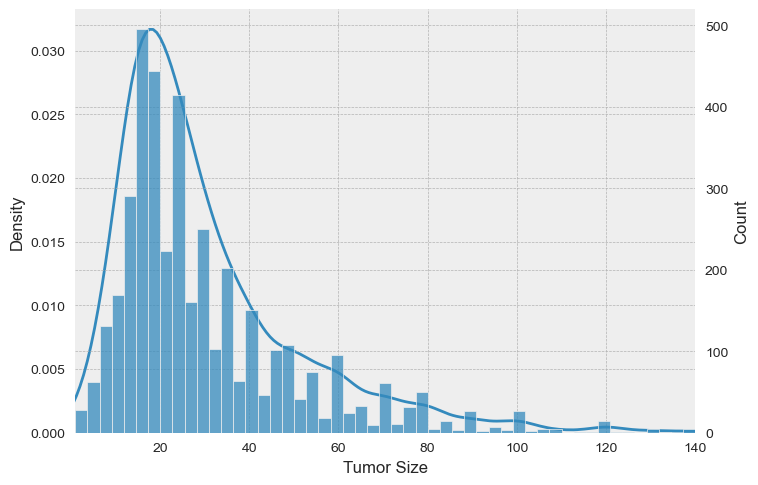

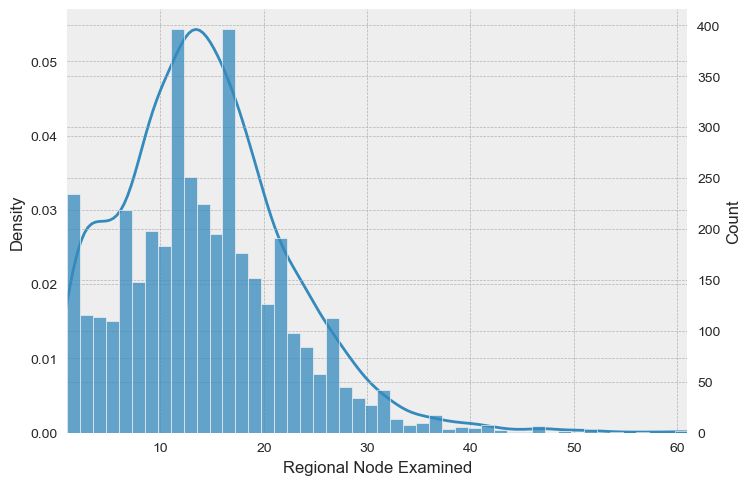

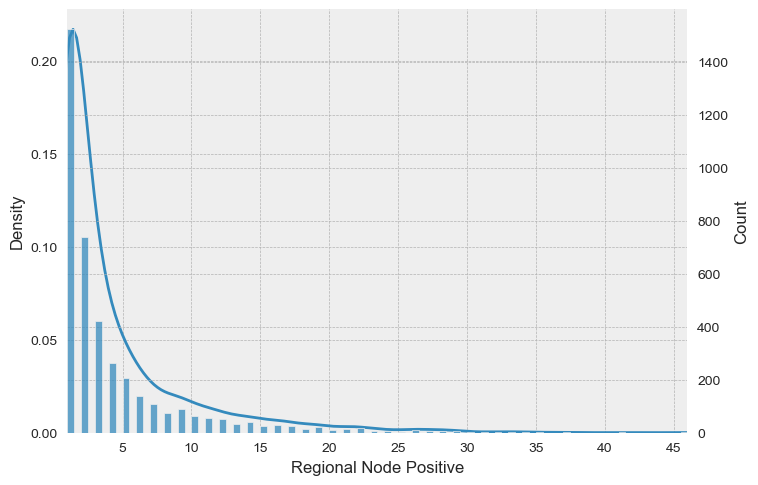

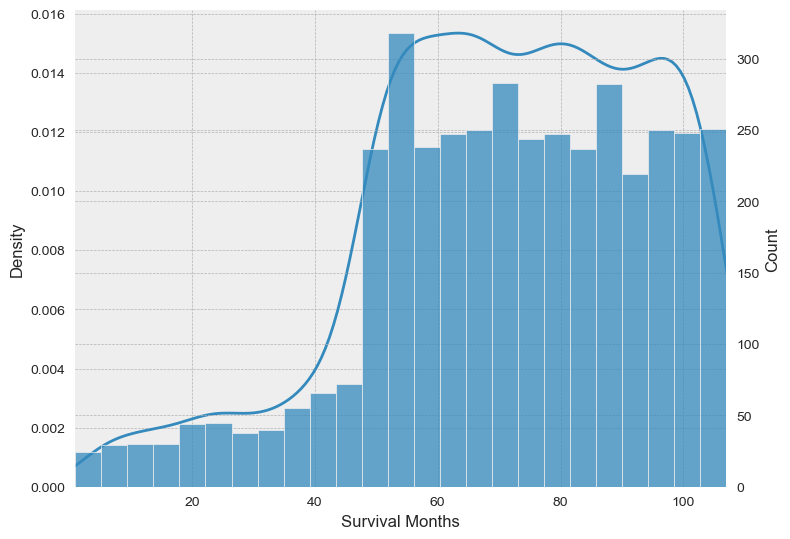

In [67]:
num_col_explorer(df, num_cols[:-1], 'Status')

### Obersevations on the distribution of numerical columns
- Age
    - the age distribution ranges from 30 years to 69 years
    - the mean age is 54 years
    - the distribution is skewed slightly to the left
- Tumor Size
    - tumor sizes ranges from 1 mm to 140 mm
    - the mean size is 25 mm
    - the distribution is highly skewed towards the right
- Regional Nodes Examined
    - the number of examined nodes ranges from 1 - 61
    - the mean number of nodes examined is 14
    - the distribution is highly skewed towards the right
- Regional Nodes Positive
    - the number of positive nodes ranges from 1 - 46
    - the mean number of nodes examined is 2
    - the distribution is fairly skewed towards the right
- Survival Months
    - Survival Months range from 1 month to 107 months
    - the mean number of months survived is 73 months
    - the distribution is skewed fairly to the left

In [68]:
plt.style.use('seaborn')
# function to explore num_cols by target
def num_col_explorer_box(data, num_cols, target_name):
    """Displays box plot of numerical columns.
    Args: 
        df (pd.DataFrame) : DataFrame
        num_cols(list) : list of numerical columns to use
        target_name(str) : string of the target variable
    Returns:
        displays box plots
    """
    for col in num_cols:
        fig2, ax = plt.subplots(figsize=(6,5))
        df.boxplot(column=col, by=target_name, ax=ax)
        #ax.set(title=col+f' by {target_name}', xlabel=col)
    plt.tight_layout()

C:\Users\bmerg\AppData\Local\Temp\ipykernel_6216\353448520.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


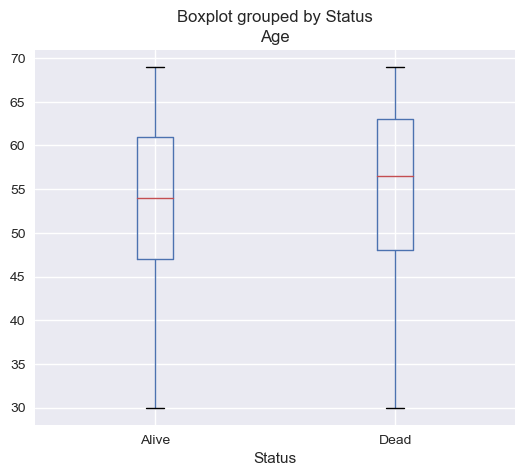

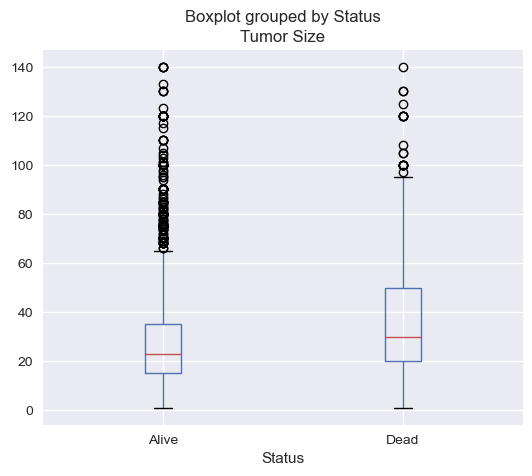

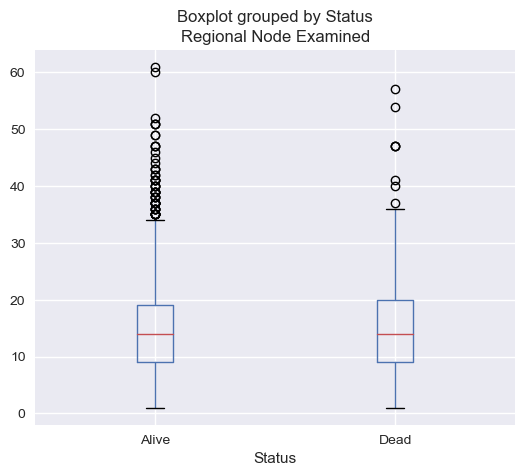

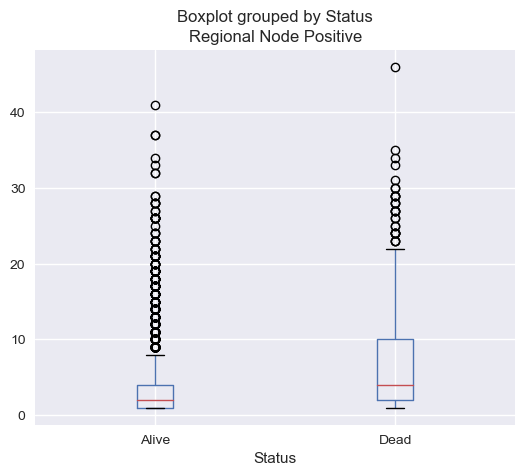

In [69]:
num_col_explorer_box(df, num_cols[:-1], 'Status')

In [139]:
# function to explore distribution of num_cols by target side by side
def num_col_explorer_dist(data, cols_dist, target_name):
    """Displays box plot of numerical columns.
    Args: 
        df (pd.DataFrame) : DataFrame
        cols_dist(list) : list of numerical columns to use (max. 3 columns!)
        target_name(str) : string of the target variable
    Returns:
        displays max. 3 box plots side by side
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(cols_dist), figsize=(14,6))
    fig.suptitle(f'Distribution of {cols_dist} by {target_name}', y = 0.95);
    for col, ax in zip(cols_dist, axes.ravel()):
        sns.boxplot(data=df, x=target_name, y=col, ax=ax)
    plt.tight_layout()

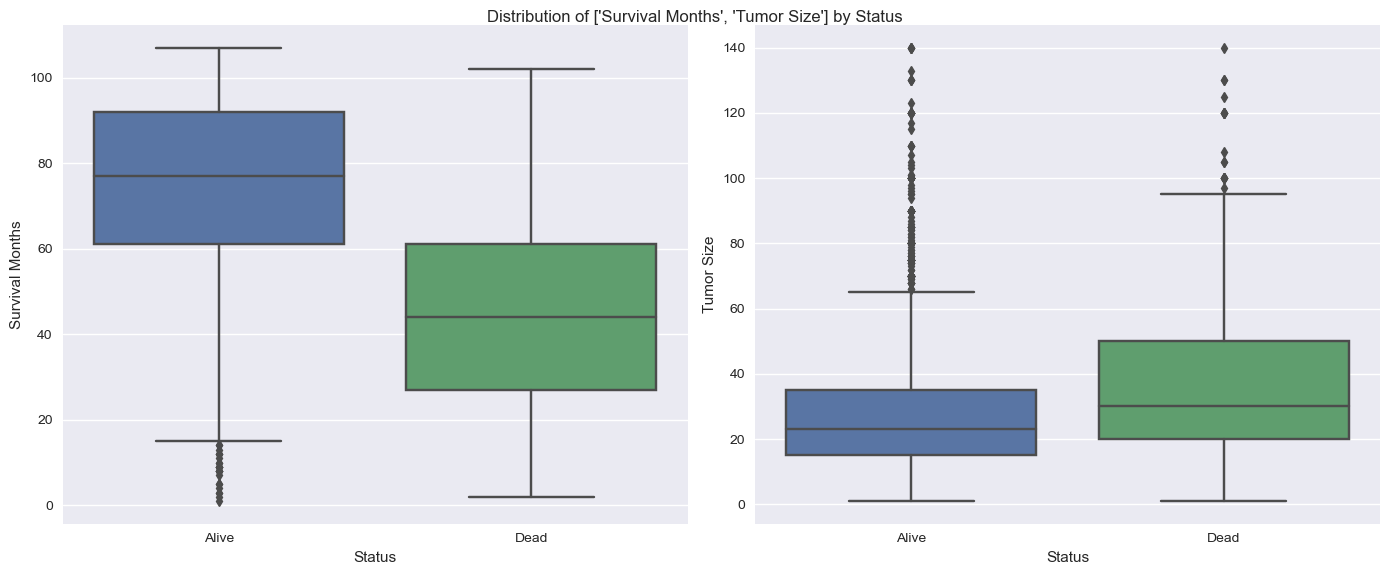

In [71]:
# distribution of survival months and tumor size side by side
cols_dist = ['Survival Months', 'Tumor Size']
num_col_explorer_dist(df, cols_dist, 'Status')

### Observations on outliers ['Survival Months', 'Tumor Size']
- As to be expected, the number of 'Survival Months' is much higher in the 'Alive' category, with a median around 77 month
- Tumor sizes in general are lower in the 'Alive' category but many outliers in tumor size up to the max. size are also found in the 'Alive' category

In [72]:
#['Progesteron_Estrogen_Status']: Positive status if status of both receptors is positive
mask = (df['Estrogen Status'] == 'Positive') | (df['Progesterone Status'] == 'Positive')
conditions = [mask, ~mask]
values = ['Positive', 'Negative']
df['Estrogen_Progesteron_Status'] = np.select(conditions, values)


# distribution of survival months and tumor size by 'Estrogen_Progesteron_Status' side by side
cols_dist = ['Survival Months', 'Tumor Size']
num_col_explorer_dist(df, cols_dist, 'Estrogen_Progesteron_Status')

### Observations on outliers ['Survival Months', 'Tumor Size'] by combined Estrogen_Progesteron_Status
- higher numbers of Survival Months and lower tumor sizes can be found if patients have a positive hormone status in both Estrogen and Progesterone 

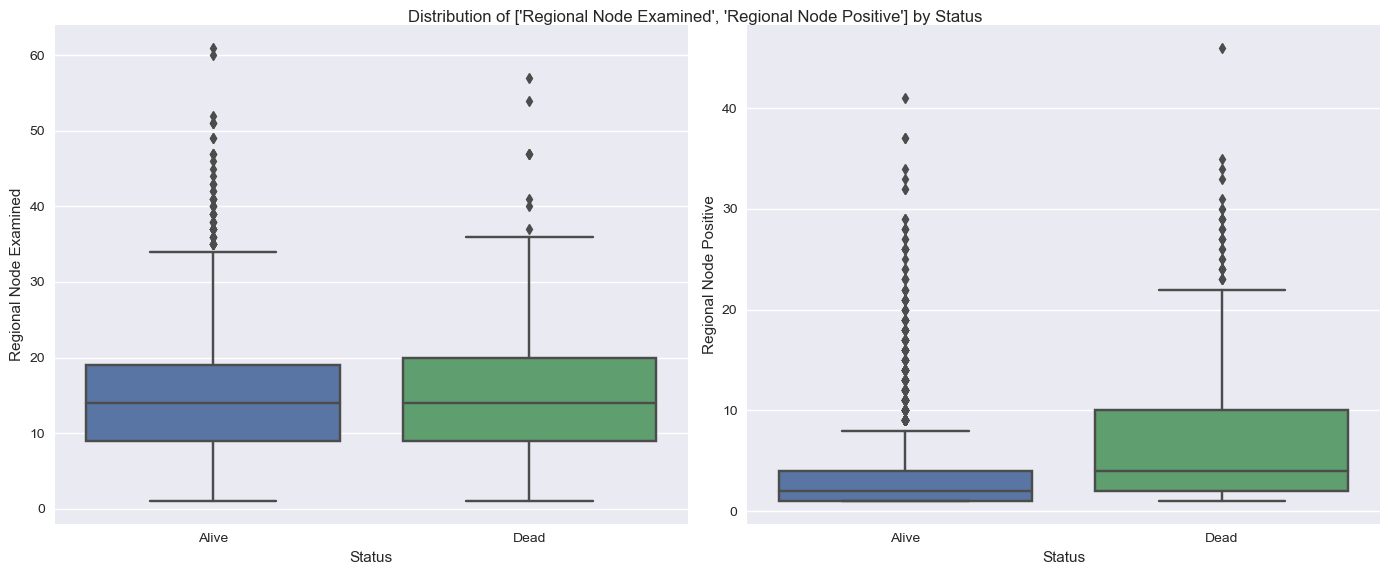

In [73]:
# distribution of Regional Node Examined and Regional Node Positive side by side
cols_dist = ['Regional Node Examined', 'Regional Node Positive']
num_col_explorer_dist(df, cols_dist, 'Status')

### Observations on outliers ['Regional Node Examined', 'Regional Node Positive']
- the difference between the target category in regards to Nodes Examined is very small, with more outliers in the higher counts for the 'Alive' category
- more positive nodes can be found in the category 'Dead', which is to be expected. Both target categories show outliers in the higher counts. 


Conclusion: 
We decided against removal of outliers in all variables since the total number of patients in the dataset used was already low. If the dataset could be expanded to a higher patient count, outlier detection and removal could be important steps to optimize the training of machine learning models.

In [74]:
# correcting typo
df = df.rename(columns={'T Stage ':'T Stage'})
df = df.rename(columns={'Reginol Node Positive' : 'Regional Node Positive'})
# adding Status_encoded column
df.loc[:,'Status_encoded'] = df.loc[:,'Status'].map({'Alive':0, 'Dead':1})

# remapping ordinal columns for EDA
df.loc[:,'T Stage'] = df.loc[:,'T Stage'].map({'T1':0, 'T2':1, 'T3':2, 'T4':3})
df.loc[:,'N Stage'] = df.loc[:,'N Stage'].map({'N1':0, 'N2':1, 'N3':2})
df.loc[:,'6th Stage'] = df.loc[:,'6th Stage'].map({'IIA':0, 'IIIA':1, 'IIIC':2, 'IIB':3, 'IIIB':4})
df.loc[:,'differentiate'] = df.loc[:,'differentiate'].map({'Poorly differentiated':2, 
                                                           'Moderately differentiated':1,
                                                             'Well differentiated':0,
                                                             'Undifferentiated':3})
df.loc[:,'Grade'] = df.loc[:,'Grade'].map({'3':2,
                                            '2':1,
                                            '1':0,
                                            ' anaplastic; Grade IV': 3})
df.loc[:,'A Stage'] = df.loc[:,'A Stage'].map({'Regional':0, 'Distant':1})

dtypes_columns = {'Age' : 'int64',
'Race' : 'category',
'Marital Status' : 'category',
'T Stage' : 'int64', 
'N Stage' : 'int64',
'6th Stage' : 'int64',
'differentiate' : 'int64',
'Grade' : 'int64',
'A Stage' : 'int64', 
'Tumor Size' : 'int64',
'Estrogen Status' : 'category',
'Progesterone Status' : 'category',
'Regional Node Examined' : 'int64',
'Regional Node Positive' : 'int64',
'Survival Months' : 'int64',
'Status' : 'category',
'Status_encoded' : 'int64'}
df = df.astype(dtypes_columns)

In [75]:
# correlation numbers
corr = df.corr(numeric_only=True)
corr

Age   T Stage   N Stage  6th Stage  \
Age                     1.000000 -0.066914  0.002883  -0.044969   
T Stage                -0.066914  1.000000  0.277015   0.563704   
N Stage                 0.002883  0.277015  1.000000   0.093911   
6th Stage              -0.044969  0.563704  0.093911   1.000000   
differentiate          -0.099294  0.131470  0.162501   0.097191   
Grade                  -0.099294  0.131470  0.162501   0.097191   
A Stage                -0.020860  0.221124  0.260573   0.137213   
Tumor Size             -0.077215  0.809176  0.277905   0.303358   
Regional Node Examined -0.033345  0.114102  0.328276   0.082604   
Regional Node Positive  0.012586  0.243075  0.838073   0.142749   
Survival Months        -0.009390 -0.085718 -0.139577  -0.053633   
Status_encoded          0.055921  0.154699  0.255772   0.091873   

                        differentiate     Grade   A Stage  Tumor Size  \
Age                         -0.099294 -0.099294 -0.020860   -0.077215   
T Stage                      0.131470  0.131470  0.221124    0.809176   
N Stage                      0.162501  0.162501  0.260573    0.277905   
6th Stage                    0.097191  0.097191  0.137213    0.303358   
differentiate                1.000000  1.000000  0.039459    0.119367   
Grade                        1.000000  1.000000  0.039459    0.119367   
A Stage                      0.039459  0.039459  1.000000    0.123883   
Tumor Size                   0.119367  0.119367  0.123883    1.000000   
Regional Node Examined       0.084416  0.084416  0.069010    0.104352   
Regional Node Positive       0.135319  0.135319  0.232849    0.242322   
Survival Months             -0.067669 -0.067669 -0.070109   -0.086901   
Status_encoded               0.161398  0.161398  0.096584    0.134205   

                        Regional Node Examined  Regional Node Positive  \
Age                                  -0.033345                0.012586   
T Stage                               0.114102                0.243075   
N Stage                               0.328276                0.838073   
6th Stage                             0.082604                0.142749   
differentiate                         0.084416                0.135319   
Grade                                 0.084416                0.135319   
A Stage                               0.069010                0.232849   
Tumor Size                            0.104352                0.242322   
Regional Node Examined                1.000000                0.411580   
Regional Node Positive                0.411580                1.000000   
Survival Months                      -0.022054               -0.135214   
Status_encoded                        0.034772                0.256638   

                        Survival Months  Status_encoded  
Age                           -0.009390        0.055921  
T Stage                       -0.085718        0.154699  
N Stage                       -0.139577        0.255772  
6th Stage                     -0.053633        0.091873  
differentiate                 -0.067669        0.161398  
Grade                         -0.067669        0.161398  
A Stage                       -0.070109        0.096584  
Tumor Size                    -0.086901        0.134205  
Regional Node Examined        -0.022054        0.034772  
Regional Node Positive        -0.135214        0.256638  
Survival Months                1.000000       -0.476514  
Status_encoded                -0.476514        1.000000

<Axes: >

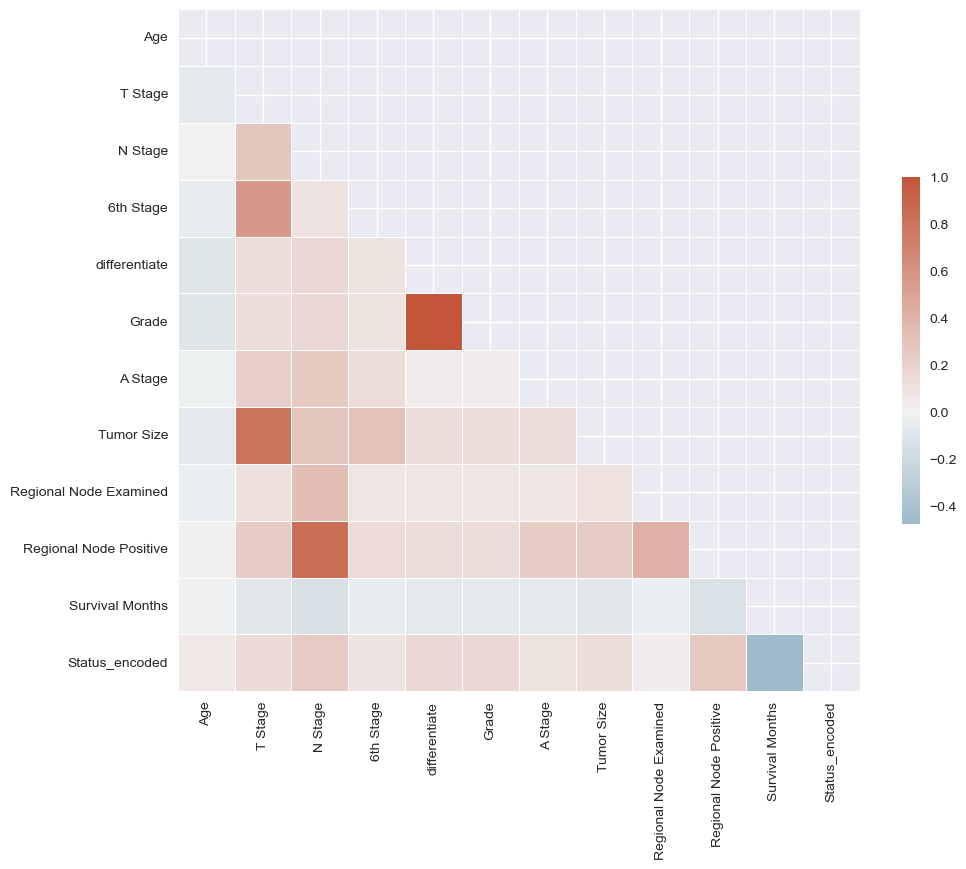

In [98]:
# correlation matrix of numerical and remapped columns
# code is from here: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

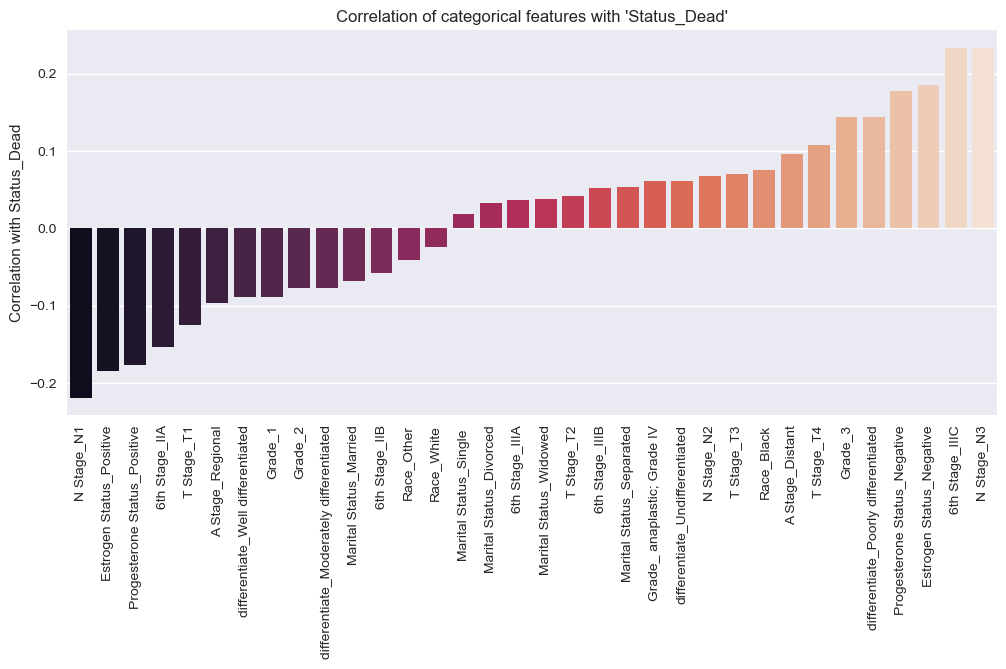

In [97]:
# reading in data for correlation graphic
df_corr = pd.read_csv('Breast_Cancer.csv', delimiter=',')

# correcting typo
df_corr = df_corr.rename(columns={'T Stage ':'T Stage'})
df_corr = df_corr.rename(columns={'Reginol Node Positive': 'Regional Node Positive'})

# dictionairy with dtypes
dtypes_columns = {'Age' : 'int64',
'Race' : 'category',
'Marital Status' : 'category',
'T Stage' : 'category', 
'N Stage' : 'category',
'6th Stage' : 'category',
'differentiate' : 'category',
'Grade' : 'category',
'A Stage' : 'category', 
'Tumor Size' : 'int64',
'Estrogen Status' : 'category',
'Progesterone Status' : 'category',
'Regional Node Examined' : 'int64',
'Regional Node Positive' : 'int64',
'Survival Months' : 'int64',
'Status' : 'category'}

# setting dtypes
df_corr = df_corr.astype(dtypes_columns)

# Categorical feature correlation with 'Status_Dead'
df_corr_encoded = pd.get_dummies(df_corr.select_dtypes('category'))
# calculating correlation 
df_corr_encoded = df_corr_encoded.corr().sort_values(by='Status_Dead')['Status_Dead'][1:-1]
# creating df_corr_encoded with info on correlation
df_corr_encoded = pd.DataFrame(df_corr_encoded).reset_index()

# Plot feature correlation with status_dead
plt.figure(figsize=(12,5))
sns.barplot(data=df_corr_encoded, x='index', y='Status_Dead', palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Correlation with Status_Dead')
plt.title("Correlation of categorical features with 'Status_Dead'");

### Observations on the correlation matrix and graph

- as expected, 'Grade' and 'differentiate' are perfectly correlated. Since both columns contain the same information, one of them will be removed before training a model
- also expected are the correlations between 'T Stage' + 'Tumor Size' and 'N Stage' + 'Regional Node Positive' since the 'Stages' are derived from the information in the other two columns
- the negative correlation of 'Survival Months' and the target column is also expected.
- the correlation of the dummy encoded categorical columns with 'Status_dead' show negativ values for lower cancer stages, well differentiated cells and positive Estrogen and Progesterone status. In contrast positive correlation with 'Status_dead' can be found in more severe cancer stages, poorly/undifferentiated cancer cells and negative Estrogen and Progesterone status.

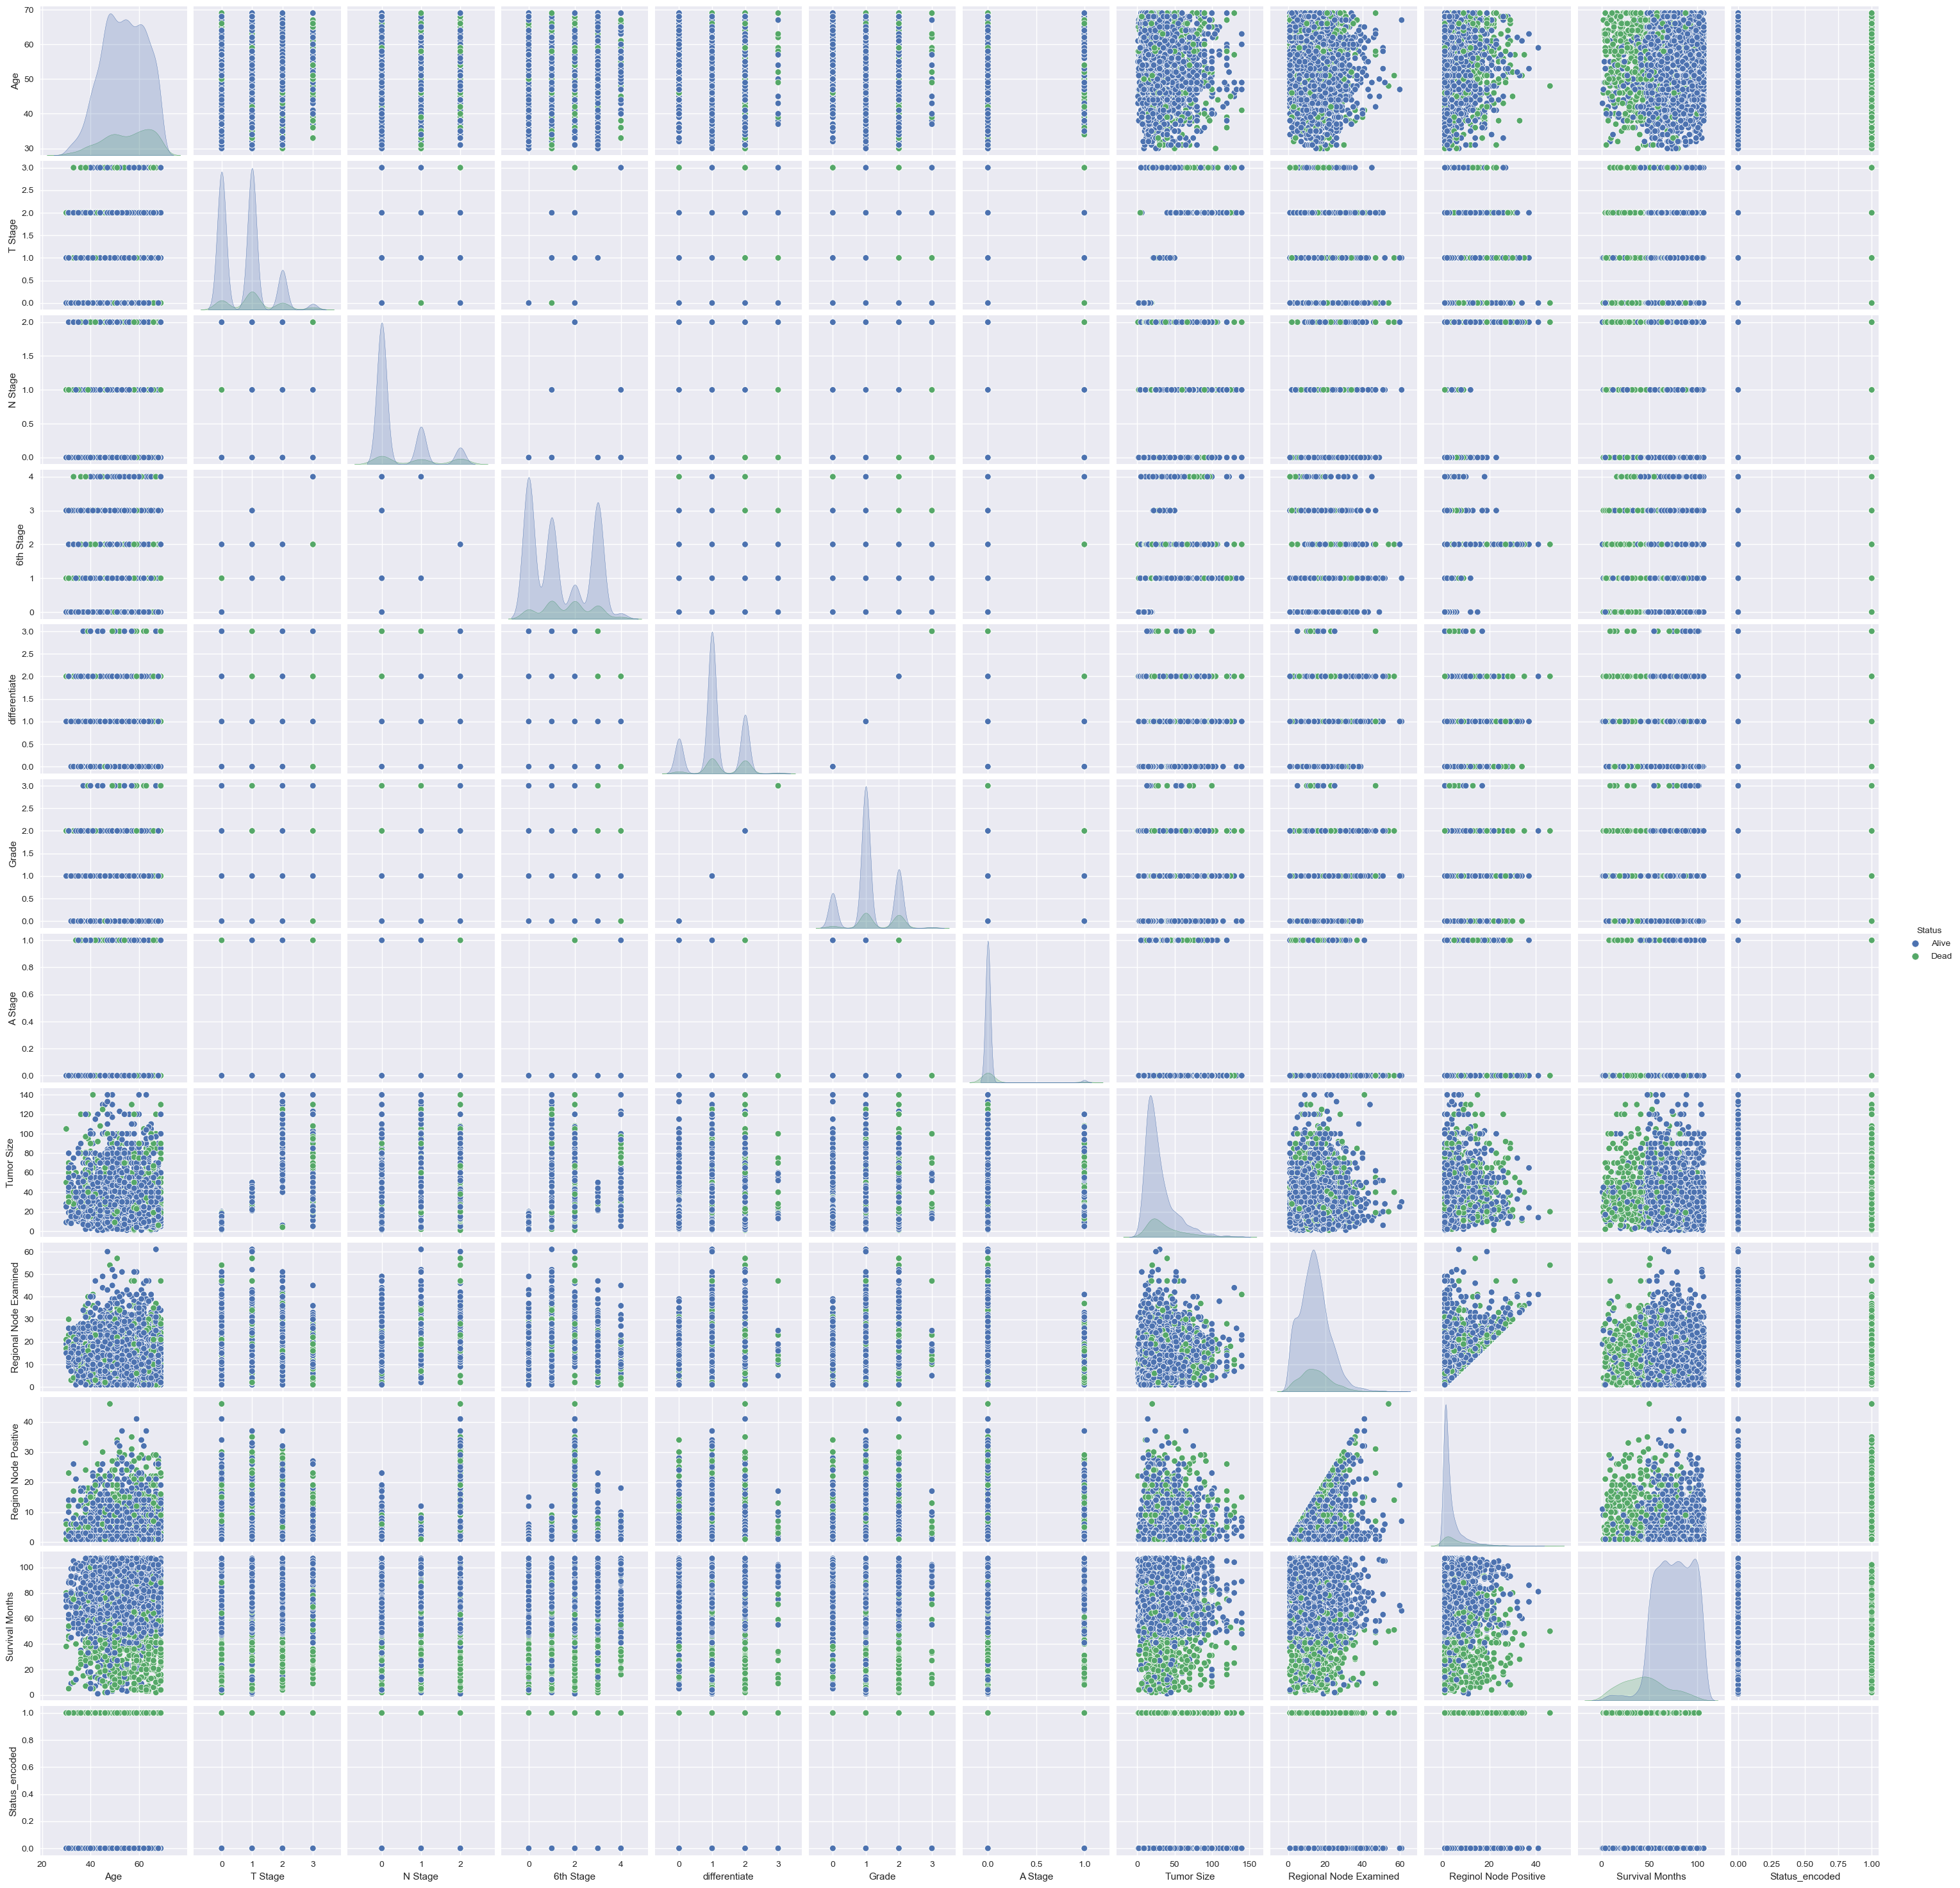

In [53]:
# creating pairplot and saving pairplot as png file for later use
png_pairplot = sns.pairplot(df, hue='Status')
png_pairplot.savefig('png_pairplot.png')

In [138]:
# function for scatterplots of up to three columns side by side
def scatterplot_explorer(data, cols_scatter, scatter_x, target_name):
    """Displays scatter plot of numerical columns.
    Args: 
        df (pd.DataFrame) : DataFrame
        cols_scatter(list) for y-axis: list of numerical columns to use (max. 3 columns!)
        scatter_x(str): string of the column name for the x-axis
        target_name(str) : string of the target variable
    Returns:
        displays max. 3 scatter plots side by side
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(cols_scatter), figsize=(14,6))
    fig.suptitle(f'Scatterplots for {cols_scatter} by {target_name}', y = 0.95);
    for col, ax in zip(cols_scatter, axes.ravel()):
        sns.scatterplot(data=df, x=scatter_x, y=col, hue=target_name, ax=ax, alpha=0.75)
    plt.tight_layout()

In [137]:
cols_scatter = ['Regional Node Examined', 'Regional Node Positive']
scatterplot_explorer(df, cols_scatter, 'Survival Months', 'Status')

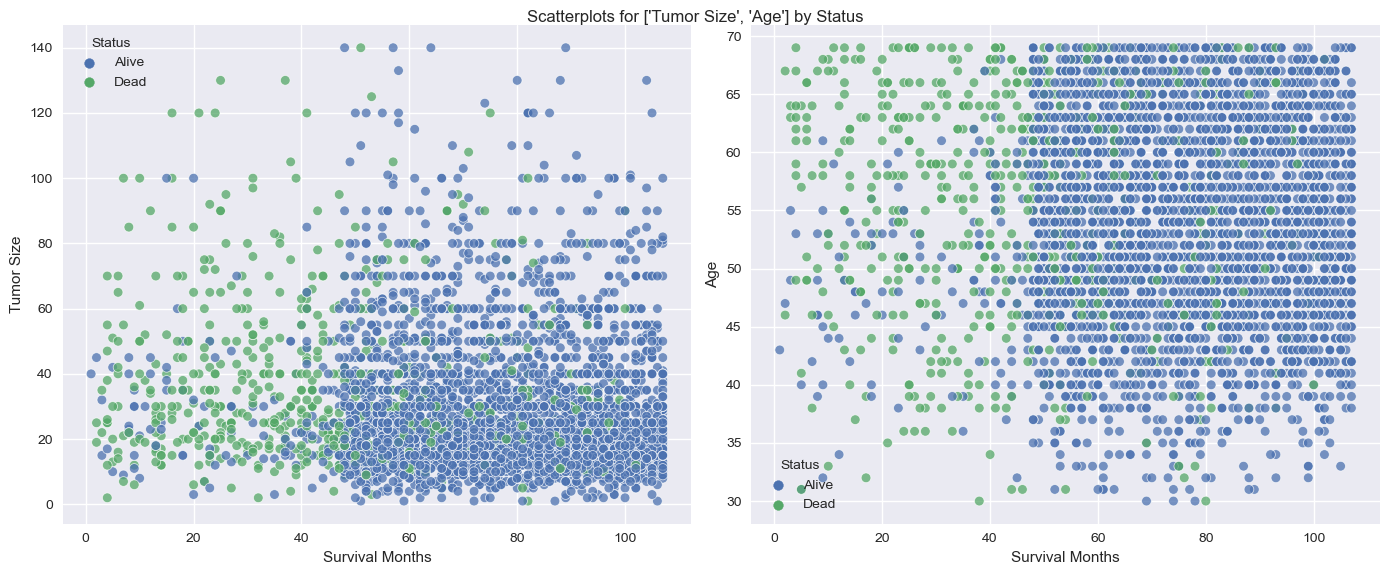

In [135]:
cols_scatter = ['Tumor Size', 'Age']
scatterplot_explorer(df, cols_scatter, 'Survival Months', 'Status')

### Observations on scatterplots

to be added